## House Price Prediction

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
df= pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: >

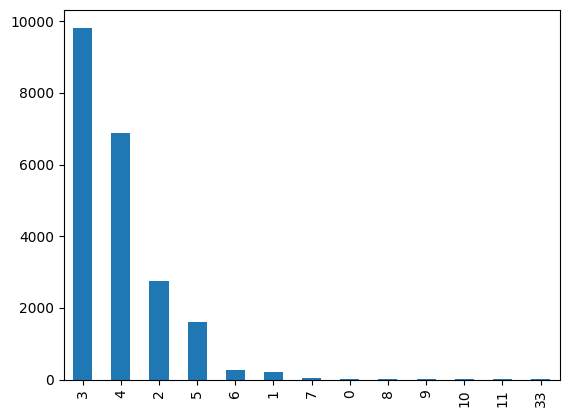

In [5]:
df['bedrooms'].value_counts().plot(kind='bar')

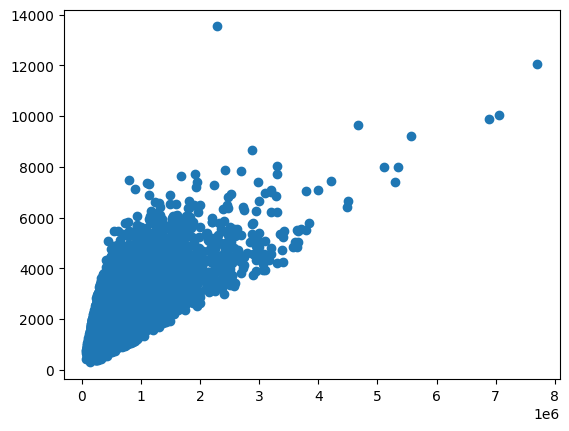

In [6]:
plt.scatter(df.price, df.sqft_living)

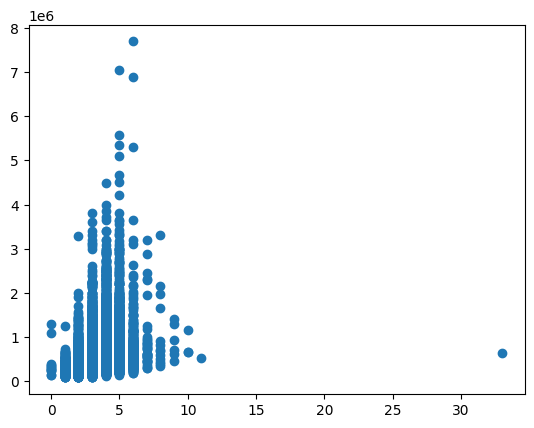

In [7]:
plt.scatter(df.bedrooms, df.price)

In [27]:
# find the null values in the dataset
df.isnull().sum()
# replace the null values in sqft_above with mean 
df['sqft_above']=df['sqft_above'].fillna(df['sqft_above'].mean())

In [28]:
train=df.drop(['id', 'price'], axis=1)

In [29]:
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg=LinearRegression()

In [32]:
y=df['price']

In [33]:
conv_date=[ 1 if values==2014 else 0 for values in df.date]
df['date']=conv_date
X=df.drop(['id', 'price'], axis=1)

In [35]:
# split the data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# fit the model 
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
reg.score(X_test, y_test)

0.7006785748663367

regression score is not good enough.. lets try gradient boosting regressor

In [40]:
# import gradient boost regressor 
from sklearn import ensemble
gbr=ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=10, min_samples_split=2, learning_rate=0.1)

In [41]:
# fit the GBRegressor 
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=200)

In [42]:
# lets check the score 
gbr.score(X_test, y_test)

0.8528291819434817

In [47]:
# lets predict the model
y_pred=gbr.predict(X_test[0:3])
y_pred

array([ 396915.16164232,  941468.50708527, 1117056.09136184])

In [48]:
X_test[0:3]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,0,4,2.25,2070,8893,2.0,0,0,4,8,2070.0,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,0,5,3.00,2900,6730,1.0,0,0,5,8,1830.0,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,0,4,2.50,3770,10893,2.0,0,2,3,11,3770.0,0,1997,0,98006,47.5646,-122.129,3710,9685
